# Skin Cancer Classification for Detecting Melanoma

## 1. Preprocessing

### 1.1. Data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import os
from sklearn.datasets import load_files
from keras.utils import np_utils

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.1.1 Training Data

In [4]:
# Load text files with categories as subfolder names.
path_training_data = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Part3_GroundTruth.csv"
training_data = pd.read_csv(path_training_data)

In [5]:
training_data

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0
...,...,...,...
1995,ISIC_0015220,0.0,1.0
1996,ISIC_0015233,0.0,1.0
1997,ISIC_0015260,0.0,1.0
1998,ISIC_0015284,1.0,0.0


In [6]:
print("Filename: \n", training_data['image_id'][:5])

Filename: 
 0    ISIC_0000000
1    ISIC_0000001
2    ISIC_0000002
3    ISIC_0000003
4    ISIC_0000004
Name: image_id, dtype: object


In [7]:
print("Targets: \n", training_data['melanoma'][:5])

Targets: 
 0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: melanoma, dtype: float64


In [8]:
# Getting the labels
target = np_utils.to_categorical(np.array(training_data['melanoma']), 2)
target

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [9]:
len(training_data['image_id'])# * 0.95

2000

In [10]:
# Splitting the data into the training and validation set
train_files, train_targets = training_data['image_id'][:2000], target[:2000]  #load_dataset('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/')

In [11]:
train_files

0       ISIC_0000000
1       ISIC_0000001
2       ISIC_0000002
3       ISIC_0000003
4       ISIC_0000004
            ...     
1995    ISIC_0015220
1996    ISIC_0015233
1997    ISIC_0015260
1998    ISIC_0015284
1999    ISIC_0015295
Name: image_id, Length: 2000, dtype: object

In [12]:
train_targets

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

###1.1.2 Validation Data

In [13]:
# Load text files with categories as subfolder names.
path_validation_data = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Part3_GroundTruth.csv"
validation_data = pd.read_csv(path_validation_data)

In [14]:
validation_data

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0
...,...,...,...
145,ISIC_0015443,0.0,0.0
146,ISIC_0015445,0.0,0.0
147,ISIC_0015483,0.0,0.0
148,ISIC_0015496,0.0,0.0


In [15]:
print("Filename: \n", validation_data['image_id'][:5])

Filename: 
 0    ISIC_0001769
1    ISIC_0001852
2    ISIC_0001871
3    ISIC_0003462
4    ISIC_0003539
Name: image_id, dtype: object


In [16]:
print("Targets: \n", validation_data['melanoma'][:5])

Targets: 
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: melanoma, dtype: float64


In [17]:
# Getting the labels
target = np_utils.to_categorical(np.array(validation_data['melanoma']), 2)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [18]:
len(validation_data['image_id'])# * 0.95

150

In [19]:
# train_files, train_targets = training_data['image_id'][:2000], target[:2000]
valid_files, valid_targets = validation_data['image_id'][:150], target[:150]

In [20]:
valid_files

0      ISIC_0001769
1      ISIC_0001852
2      ISIC_0001871
3      ISIC_0003462
4      ISIC_0003539
           ...     
145    ISIC_0015443
146    ISIC_0015445
147    ISIC_0015483
148    ISIC_0015496
149    ISIC_0015627
Name: image_id, Length: 150, dtype: object

In [21]:
valid_targets

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### 1.2. Image preprocessing

In [22]:
# Importing the libraries
import keras
from keras.preprocessing import image                  
from tqdm import tqdm
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

In [23]:
def path_to_tensor(img_path):
    """
    Getting a tensor from a given path.
    """
    # Loading the image
    img = image.load_img(img_path, target_size=(512, 512))
    # Converting the image to numpy array
    x = image.img_to_array(img)   
    # convert 3D tensor to 4D tensor with shape (1, 512, 512, 3)
    return np.expand_dims(x, axis=0)

In [24]:
def paths_to_tensor(img_paths):
    """
    # Getting a list of tensors from a given path directory.
    """
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [25]:
train_files

0       ISIC_0000000
1       ISIC_0000001
2       ISIC_0000002
3       ISIC_0000003
4       ISIC_0000004
            ...     
1995    ISIC_0015220
1996    ISIC_0015233
1997    ISIC_0015260
1998    ISIC_0015284
1999    ISIC_0015295
Name: image_id, Length: 2000, dtype: object

In [26]:
import os
os.chdir("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/")
!ls

ISIC_0000000.jpg  ISIC_0002885.jpg  ISIC_0011227.jpg  ISIC_0013474.jpg
ISIC_0000001.jpg  ISIC_0002948.jpg  ISIC_0011229.jpg  ISIC_0013480.jpg
ISIC_0000002.jpg  ISIC_0002975.jpg  ISIC_0011230.jpg  ISIC_0013486.jpg
ISIC_0000003.jpg  ISIC_0002976.jpg  ISIC_0011292.jpg  ISIC_0013487.jpg
ISIC_0000004.jpg  ISIC_0003005.jpg  ISIC_0011294.jpg  ISIC_0013488.jpg
ISIC_0000006.jpg  ISIC_0003051.jpg  ISIC_0011296.jpg  ISIC_0013489.jpg
ISIC_0000007.jpg  ISIC_0003056.jpg  ISIC_0011297.jpg  ISIC_0013490.jpg
ISIC_0000008.jpg  ISIC_0003174.jpg  ISIC_0011298.jpg  ISIC_0013492.jpg
ISIC_0000009.jpg  ISIC_0003308.jpg  ISIC_0011300.jpg  ISIC_0013493.jpg
ISIC_0000010.jpg  ISIC_0003346.jpg  ISIC_0011303.jpg  ISIC_0013494.jpg
ISIC_0000011.jpg  ISIC_0003728.jpg  ISIC_0011304.jpg  ISIC_0013495.jpg
ISIC_0000012.jpg  ISIC_0004110.jpg  ISIC_0011305.jpg  ISIC_0013497.jpg
ISIC_0000013.jpg  ISIC_0004115.jpg  ISIC_0011306.jpg  ISIC_0013498.jpg
ISIC_0000014.jpg  ISIC_0004166.jpg  ISIC_0011310.jpg  ISIC_0013499.jpg
ISIC_0

In [27]:
# pre-process the data for Keras
# Training Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG
# os.path.join(folder, file)
dt = os.walk('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG')
files = []
for root, d_names, f_names in dt:
    for filename in f_names:
        files.append(os.path.join(root, filename))

In [28]:
files

['/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011217.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011214.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011220.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011230.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011218.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011292.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011223.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011300.jpg',
 '/content/drive/MyDrive

In [29]:
train_tensors = paths_to_tensor(files).astype('float32')/255

100%|██████████| 2000/2000 [17:12<00:00,  1.94it/s]


In [30]:
import os
os.chdir("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/")
!ls

ISIC_0001769.jpg  ISIC_0012221.jpg  ISIC_0013501.jpg  ISIC_0014611.jpg
ISIC_0001852.jpg  ISIC_0012222.jpg  ISIC_0013518.jpg  ISIC_0014616.jpg
ISIC_0001871.jpg  ISIC_0012254.jpg  ISIC_0013527.jpg  ISIC_0014618.jpg
ISIC_0003462.jpg  ISIC_0012256.jpg  ISIC_0013549.jpg  ISIC_0014620.jpg
ISIC_0003539.jpg  ISIC_0012288.jpg  ISIC_0013561.jpg  ISIC_0014623.jpg
ISIC_0003582.jpg  ISIC_0012306.jpg  ISIC_0013562.jpg  ISIC_0014624.jpg
ISIC_0003657.jpg  ISIC_0012313.jpg  ISIC_0013632.jpg  ISIC_0014633.jpg
ISIC_0003805.jpg  ISIC_0012316.jpg  ISIC_0013637.jpg  ISIC_0014635.jpg
ISIC_0004337.jpg  ISIC_0012335.jpg  ISIC_0013644.jpg  ISIC_0014637.jpg
ISIC_0006651.jpg  ISIC_0012380.jpg  ISIC_0013651.jpg  ISIC_0014688.jpg
ISIC_0006671.jpg  ISIC_0012383.jpg  ISIC_0013663.jpg  ISIC_0014712.jpg
ISIC_0006815.jpg  ISIC_0012400.jpg  ISIC_0013702.jpg  ISIC_0014809.jpg
ISIC_0006914.jpg  ISIC_0012417.jpg  ISIC_0013736.jpg  ISIC_0014829.jpg
ISIC_0007141.jpg  ISIC_0012434.jpg  ISIC_0013793.jpg  ISIC_0014857.jpg
ISIC_0

In [31]:
dt = os.walk('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG')
validation_files = []
for root, d_names, f_names in dt:
    for filename in f_names:
        validation_files.append(os.path.join(root, filename))

In [32]:
validation_files

['/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0004337.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003582.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003539.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003805.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0006651.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001852.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003657.jpg',
 '/content/drive

In [33]:
valid_tensors = paths_to_tensor(validation_files).astype('float32')/255

100%|██████████| 150/150 [01:51<00:00,  1.34it/s]


In [34]:
# Saving the data
np.save("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_training_tensors.npy", train_tensors)
np.save("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_validation_tensors.npy", valid_tensors)

In [35]:
# Loading the data
train_tensors = np.load("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_training_tensors.npy")
valid_tensors = np.load("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_validation_tensors.npy")

## 2. Training the model

In [36]:
# Importing the keras libraries
import keras
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard

### 2.1. MobileNet architecture

In [37]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    #mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [38]:
# Getting the mobilenet
mobilenet_model = mobilenet_architecture()

In [39]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5', 
                               verbose=1, 
                               save_best_only=True)

In [40]:
mobilenet_model.fit(train_tensors, 
                    train_targets, 
                    batch_size = 8,
                    validation_data = (valid_tensors, valid_targets),
                    epochs = 5,
                    callbacks=[checkpointer], 
                    verbose=1)

Epoch 1/5
250/250 [==============================] - 85s 210ms/step - loss: 0.6249 - accuracy: 0.7637 - val_loss: 0.5119 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.51190, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
Epoch 2/5
250/250 [==============================] - 51s 203ms/step - loss: 0.5123 - accuracy: 0.8123 - val_loss: 0.5399 - val_accuracy: 0.8000

Epoch 00002: val_loss did not improve from 0.51190
Epoch 3/5
250/250 [==============================] - 51s 202ms/step - loss: 0.4967 - accuracy: 0.8250 - val_loss: 1.0952 - val_accuracy: 0.2000

Epoch 00003: val_loss did not improve from 0.51190
Epoch 4/5
250/250 [==============================] - 51s 202ms/step - loss: 0.4787 - accuracy: 0.8237 - val_loss: 0.7165 - val_accuracy: 0.8000

Epoch 00004: val_loss did not improve from 0.51190
Epoch 5/5
250/250 [==============================] - 51s 202ms/step - loss: 0.5064 - accuracy: 0.

In [41]:
# Loading the weights
mobilenet_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5")

### 2.2. Inception architecture

In [42]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [43]:
# Getting the inception
inception_model = inception_architecture()

In [44]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5', 
                               verbose=1, 
                               save_best_only=True)

In [45]:
inception_model.fit(train_tensors, 
                    train_targets, 
                    batch_size = 8,
                    validation_data = (valid_tensors, valid_targets),
                    epochs = 5,
                    callbacks=[checkpointer], 
                    verbose=1)

Epoch 1/5
250/250 [==============================] - 63s 216ms/step - loss: 0.6362 - accuracy: 0.7767 - val_loss: 0.5005 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.50046, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5
Epoch 2/5
250/250 [==============================] - 52s 208ms/step - loss: 0.5224 - accuracy: 0.8062 - val_loss: 0.5894 - val_accuracy: 0.8000

Epoch 00002: val_loss did not improve from 0.50046
Epoch 3/5
250/250 [==============================] - 52s 208ms/step - loss: 0.4900 - accuracy: 0.8148 - val_loss: 0.5110 - val_accuracy: 0.8000

Epoch 00003: val_loss did not improve from 0.50046
Epoch 4/5
250/250 [==============================] - 52s 208ms/step - loss: 0.5316 - accuracy: 0.7975 - val_loss: 10.9826 - val_accuracy: 0.3400

Epoch 00004: val_loss did not improve from 0.50046
Epoch 5/5
250/250 [==============================] - 52s 208ms/step - loss: 0.4854 - accuracy:

In [46]:
# Loading the weights
inception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5")

### 2.3. Xception architecture

In [47]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    #xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [48]:
# Getting the xception
xception_model = xception_architecture()

In [49]:
tensor_board = TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = 8)

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5', 
                               verbose=1, 
                               save_best_only=True)

xception_model.fit(train_tensors, 
                   train_targets, 
                   batch_size = 8,
                   validation_data = (valid_tensors, valid_targets),
                   epochs = 2,
                   callbacks=[checkpointer, tensor_board], 
                   verbose=1)

Epoch 1/2
250/250 [==============================] - 148s 572ms/step - loss: 0.6016 - accuracy: 0.7930 - val_loss: 0.5277 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.52765, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5
Epoch 2/2
250/250 [==============================] - 141s 564ms/step - loss: 0.5508 - accuracy: 0.7972 - val_loss: 72.8694 - val_accuracy: 0.8000

Epoch 00002: val_loss did not improve from 0.52765


In [50]:
# Loading the weights
xception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5")

## 3. Prediction

In [51]:
model_architecture = mobilenet_architecture()
weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5"

In [ ]:
predict_0_0 = 0
predict_0_1 = 0

In [52]:
def predict(img_path, 
            model_architecture = model_architecture, 
            path_model_weight = weight_path):
    # Getting the tensor of image
    image_to_predict = path_to_tensor(img_path).astype('float32')/255
    # Getting the model's architecture
    model = model_architecture
    # Loading the weights
    model.load_weights(path_model_weight)
    # Predicting
    pred = model.predict(image_to_predict)
    print("Prediction..." + " Melanoma : ", pred[0][0], " | Other : ", pred[0][1])
    predict_0_0 = pred[0][0]
    predict_0_1 = pred[0][1]
    # predict_0_0 = 0.7350246
    # predict_0_1 = 0.26497543
    if np.argmax(pred) == 0:
        return [1., 0.]
    elif np.argmax(pred) == 1:
        return [0., 1.]

In [53]:
predict("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg")

Prediction... Melanoma :  0.7350246  | Other :  0.26497543


[1.0, 0.0]

## 4. Evaluating the model

In [54]:
# Importing the libraries
from sklearn.metrics import roc_curve, auc
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
def compute_roc(y_true, y_score):
    """ 
    Computing the "Receiving Operating Characteristic curve" and area
    """
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_score) 
    auroc = auc(false_positive_rate, true_positive_rate) 
    return false_positive_rate, true_positive_rate, auroc

In [56]:
def plot_roc(y_true, y_score):
    """ 
    Ploting the Receiving Operating Characteristic curve
    """
    false_positive_rate, true_positive_rate, auroc = compute_roc(y_true, y_score)
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.plot(false_positive_rate, 
             true_positive_rate, 
             color='darkorange',
             lw=2, 
             label='ROC curve (area = {:.2f})'.format(auroc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic example', fontsize=15)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()

In [57]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [58]:
plt.style.use("seaborn-white")

### 4.1. Evaluating MobileNet

In [59]:
# Compute test set predictions
NUMBER_TEST_SAMPLES = 100

y_true = valid_targets[:NUMBER_TEST_SAMPLES]
y_score = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    probs = predict(img_path = validation_files[index])
    print("Real values..." + "Melanoma : ", valid_targets[index][0], " | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score.append(probs)
    
correct = np.array(y_true) == np.array(y_score)

Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.2649755
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.2649755
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values...Melanoma :  1.0  | Other

In [60]:
print("Accuracy = %2.2f%%" % (np.mean(correct)*100))

Accuracy = 84.00%


In [61]:
# Re-ordering the actual y (for ROC)
y_true_2 = []
for i in range(len(y_true)):
    y_true_2.append(y_true[i][0])

In [62]:
# Re-ordering the predicte y (for ROC)
y_score_2 = []
for i in range(len(y_score)):
    y_score_2.append(y_score[i][0])

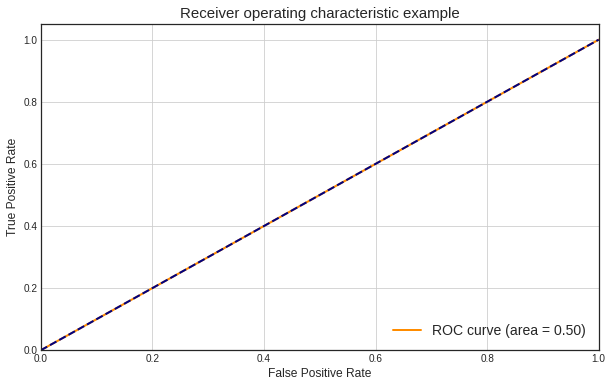

In [63]:
plot_roc(y_true_2, y_score_2)

In [64]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [65]:
TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE = positive_negative_measurement(y_true_2, y_score_2)
postives_negatives = [[TRUE_POSITIVE, FALSE_POSITIVE], 
                      [FALSE_NEGATIVE, TRUE_NEGATIVE]]

In [66]:
postives_negatives

[[84, 16], [0, 0]]

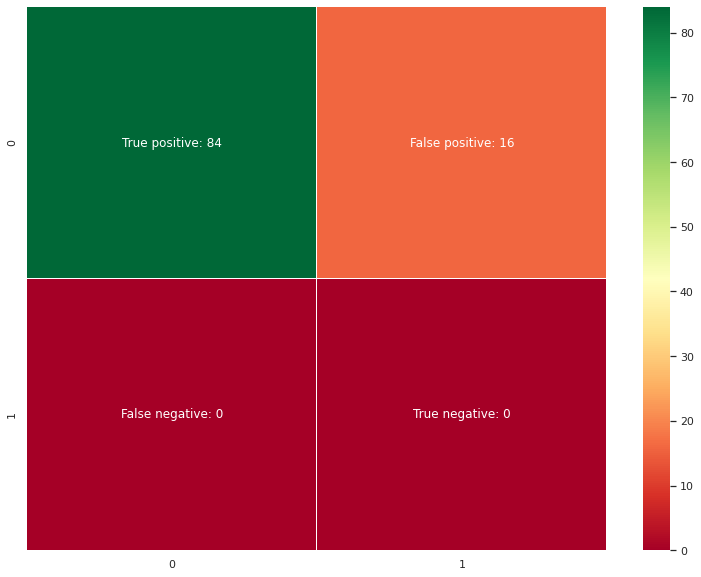

In [67]:
import seaborn as sns
sns.set()
labels =  np.array([['True positive: ' + str(TRUE_POSITIVE),
                     'False positive: ' + str(FALSE_POSITIVE)],
                    ['False negative: ' + str(FALSE_NEGATIVE),
                     'True negative: ' + str(TRUE_NEGATIVE)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives, annot = labels, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [68]:
labels

array([['True positive: 84', 'False positive: 16'],
       ['False negative: 0', 'True negative: 0']], dtype='<U18')

In [69]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)
print("Sensitivity: ", sensitivity)

Sensitivity:  1.0


In [70]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
    print("Specifity: ", specifity)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


In [71]:
# Precision | positive predictive value (PPV)
predcision = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)
print("Precision: ", predcision)

Precision:  0.84


In [72]:
# Negative predictive value (NPV)
try:
    npv = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
    print("Negative predictive value: ", npv)
except:
    print("0 Negative Predictions")

0 Negative Predictions


In [73]:
# Accuracy 
accuracy = (TRUE_POSITIVE + TRUE_NEGATIVE) / (TRUE_POSITIVE + FALSE_POSITIVE + TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Accuracy: ", accuracy)

Accuracy:  0.84


### 4.2. Evaluating Inception

In [74]:
# Compute test set predictions
NUMBER_TEST_SAMPLES = 100

y_true = valid_targets[:NUMBER_TEST_SAMPLES]
y_score = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    probs = predict(img_path = validation_files[index])
    print("Real values {}...".format(index+1) + "Melanoma : ", valid_targets[index][0], " | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score.append(probs)
    
correct = np.array(y_true) == np.array(y_score)

Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values 1...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values 2...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.2649755
Real values 3...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.2649755
Real values 4...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values 5...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.7350246  | Other :  0.26497543
Real values 6...Melanoma :  

In [75]:
print("Accuracy = %2.2f%%" % (np.mean(correct)*100))

Accuracy = 84.00%


In [76]:
# Re-ordering the actual y (for ROC)
y_true_2 = []
for i in range(len(y_true)):
    y_true_2.append(y_true[i][0])
    
# Re-ordering the predicte y (for ROC)
y_score_2 = []
for i in range(len(y_score)):
    y_score_2.append(y_score[i][0])

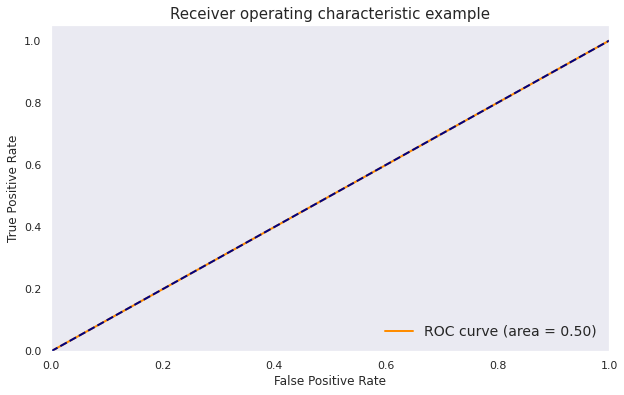

In [77]:
plot_roc(y_true_2, y_score_2)

In [78]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [79]:
TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE = positive_negative_measurement(y_true_2, y_score_2)
postives_negatives = [[TRUE_POSITIVE, FALSE_POSITIVE], 
                      [FALSE_NEGATIVE, TRUE_NEGATIVE]]

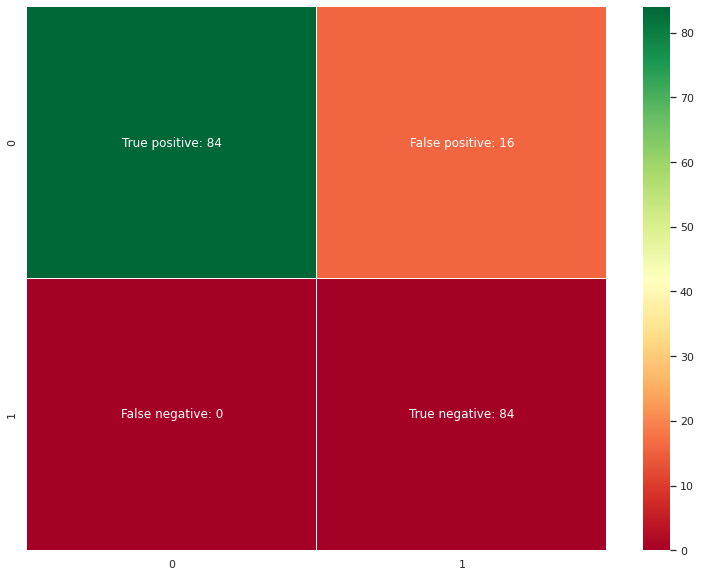

In [80]:
import seaborn as sns
sns.set()
labels =  np.array([['True positive: ' + str(TRUE_POSITIVE),
                     'False positive: ' + str(FALSE_POSITIVE)],
                    ['False negative: ' + str(FALSE_NEGATIVE),
                     'True negative: ' + str(TRUE_POSITIVE)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives, annot = labels, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [81]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)
print("Sensitivity: ", sensitivity)

Sensitivity:  1.0


In [82]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
    print("Specifity: ", specifity)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


In [83]:
# Precision | positive predictive value (PPV)
predcision = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)
print("Precision: ", predcision)

Precision:  0.84


In [84]:
# Negative predictive value (NPV)
try:
    npv = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
    print("Negative predictive value: ", npv)
except:
    print("0 Negative Predictions")

0 Negative Predictions


In [85]:
# Accuracy 
accuracy = (TRUE_POSITIVE + TRUE_NEGATIVE) / (TRUE_POSITIVE + FALSE_POSITIVE + TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Accuracy: ", accuracy)

Accuracy:  0.84


## 5. Ensembling the models

In [86]:
from keras.layers import Input

In [87]:
# Single input for multiple models
model_input = Input(shape=(512, 512, 3))

In [88]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    #mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [89]:
# Model 1
mobilenet_model = mobilenet_architecture()
mobilenet_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5")

In [90]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [91]:
# Model 2
inception_model = inception_architecture()
inception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5")

In [92]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    #xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [93]:
# Model 3
xception_model = xception_architecture()
xception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5")

In [94]:
# Appending all models
models = [mobilenet_model, inception_model, xception_model]

In [95]:
def ensemble(models, model_input):
    
    outputs = [model.outputs[0] for model in models]
    
    y = keras.layers.Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

In [96]:
# Getting ensemble model
ensemble_model = ensemble(models, model_input)

In [97]:
image_to_predict = path_to_tensor("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Output_melanoma/ISIC_0000000_180_angle_flipped.jpg").astype('float32')/255.
ensemble_model.predict(image_to_predict)

array([[0.7451312 , 0.25486884]], dtype=float32)

## 5. 2. Evaluating ensemble model

In [98]:
# Compute test set predictions
NUMBER_TEST_SAMPLES = 150

y_true = valid_targets[:NUMBER_TEST_SAMPLES]
y_score = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    image_to_predict = path_to_tensor(validation_files[index]).astype("float32")/255.
    probs = ensemble_model.predict(image_to_predict)
    if np.argmax(probs) == 0:
        y_score.append([1., 0.])
    elif np.argmax(probs) == 1:
        y_score.append([0., 1.])
    print("Predicted value {}... ".format(index+1) + " Melanoma : ", probs[0][0],  " | Other : ", probs[0][1])
    print("Real values {}...".format(index+1) + "      Melanoma : ", valid_targets[index][0], "      | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    
    
correct = np.array(y_true) == np.array(y_score)

Predicted value 1...  Melanoma :  0.7450341  | Other :  0.254966
Real values 1...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 2...  Melanoma :  0.7450463  | Other :  0.25495368
Real values 2...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 3...  Melanoma :  0.74505895  | Other :  0.2549411
Real values 3...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 4...  Melanoma :  0.7450459  | Other :  0.2549541
Real values 4...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 5...  Melanoma :  0.7450402  | Other :  0.25495982
Real values 5...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------

In [99]:
print("Accuracy = %2.2f%%" % (np.mean(correct)*100))

Accuracy = 80.00%


In [100]:
# Re-ordering the actual y (for ROC)
y_true_2 = []
for i in range(len(y_true)):
    y_true_2.append(y_true[i][0])
    
# Re-ordering the predicte y (for ROC)
y_score_2 = []
for i in range(len(y_score)):
    y_score_2.append(y_score[i][0])

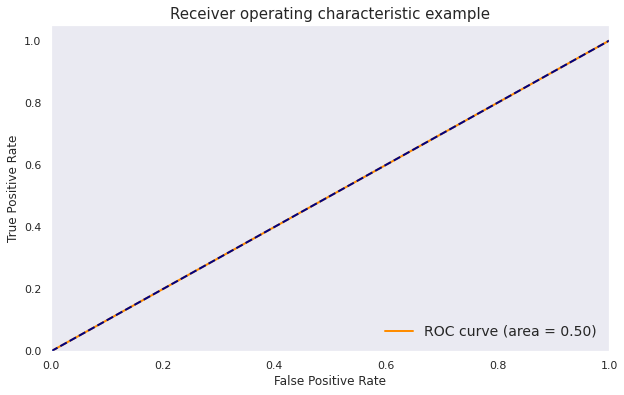

In [101]:
plot_roc(y_true_2, y_score_2)

In [102]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [103]:
TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE = positive_negative_measurement(y_true_2, y_score_2)
postives_negatives = [[TRUE_POSITIVE, FALSE_POSITIVE], 
                      [FALSE_NEGATIVE, TRUE_NEGATIVE]]

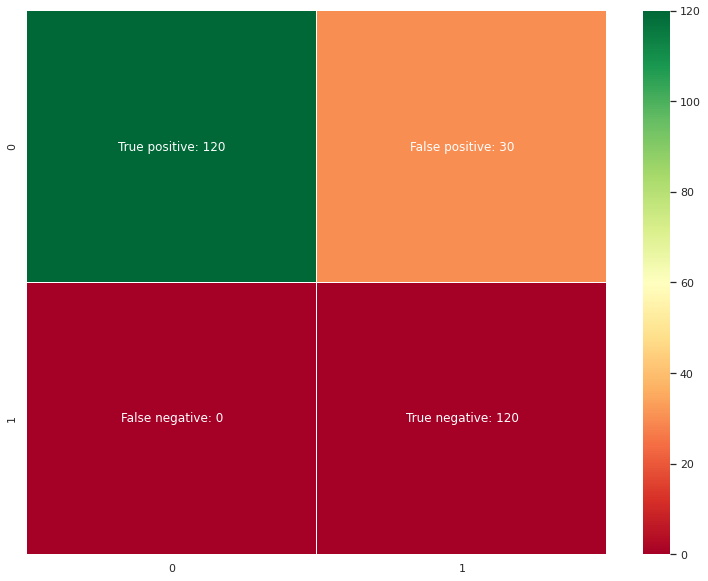

In [104]:
import seaborn as sns
sns.set()
labels =  np.array([['True positive: ' + str(TRUE_POSITIVE),
                     'False positive: ' + str(FALSE_POSITIVE)],
                    ['False negative: ' + str(FALSE_NEGATIVE),
                     'True negative: ' + str(TRUE_POSITIVE)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives, annot = labels, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [105]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)
print("Sensitivity: ", sensitivity)

Sensitivity:  1.0


In [106]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
    print("Specifity: ", specifity)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


In [107]:
# Precision | positive predictive value (PPV)
predcision = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)
print("Precision: ", predcision)

Precision:  0.8


In [108]:
# Negative predictive value (NPV)
try:
    npv = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
    print("Negative predictive value: ", npv)
except:
    print("0 Negative Predictions")

0 Negative Predictions


In [109]:
# Accuracy 
accuracy = (TRUE_POSITIVE + TRUE_NEGATIVE) / (TRUE_POSITIVE + FALSE_POSITIVE + TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Accuracy: ", accuracy)

Accuracy:  0.8


## 6. Localization

In [110]:
# Importing the libraries
from keras.applications.mobilenet import preprocess_input
import scipy
import cv2

In [111]:
path_to_model_weight = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5"

In [112]:
img_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012086.jpg"

In [113]:
def getting_two_layer_weights(path_model_weight = path_to_model_weight):
    # The model

    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    model = Model(base_model.input, output)
    #model.summary()

    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    # loading the weights
    model.load_weights(path_model_weight)
    
    # Getting the AMP layer weight
    all_amp_layer_weights = model.layers[-1].get_weights()[0]
    
    # Extracting the wanted output
    mobilenet_model = Model(inputs = model.input, outputs = (model.layers[-3].output, model.layers[-1].output))
    
    return mobilenet_model, all_amp_layer_weights

In [114]:
mobilenet_model, all_amp_layer_weights = getting_two_layer_weights(path_to_model_weight)

In [115]:
def mobilenet_CAM(img_path, model, all_amp_layer_weights):
    # Getting filtered images from last convolutional layer + model prediction output
    last_conv_output, predictions = model.predict(path_to_tensor(img_path)) # last_conv_output.shape = (1, 16, 16, 1024)
    
    # Converting the dimension of last convolutional layer to 16 x 16 x 1024     
    last_conv_output = np.squeeze(last_conv_output)
    
    # Model's prediction
    predicted_class = np.argmax(predictions)
    
    # Bilinear upsampling (resize each image to size of original image)
    mat_for_mult = scipy.ndimage.zoom(last_conv_output, (32, 32, 1), order = 1)  # dim from (16, 16, 1024) to (512, 512, 1024)
    
    # Getting the AMP layer weights
    amp_layer_weights = all_amp_layer_weights[:, predicted_class] # dim: (1024,)    
    
    # CAM for object class that is predicted to be in the image
    final_output = np.dot(mat_for_mult, amp_layer_weights) # dim: 512 x 512

    # Return class activation map (CAM)
    return final_output, predicted_class

In [116]:
final_output, predicted_class = mobilenet_CAM(img_path, mobilenet_model, all_amp_layer_weights)

In [117]:
def plot_CAM(img_path, ax, model, all_amp_layer_weights):
    # Loading the image / resizing to 512x512 / Converting BGR to RGB
    #im = cv2.resize(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB), (512, 512))
    im = path_to_tensor(img_path).astype("float32")/255.
    
    # Plotting the image
    ax.imshow(im.squeeze(), vmin=0, vmax=255)
    
    # Getting the class activation map
    CAM, pred = mobilenet_CAM(img_path, model, all_amp_layer_weights)
    
    CAM = (CAM - CAM.min()) / (CAM.max() - CAM.min())
    
    # Plotting the class activation map
    ax.imshow(CAM, cmap = "jet", alpha = 0.5, interpolation='nearest', vmin=0, vmax=1)

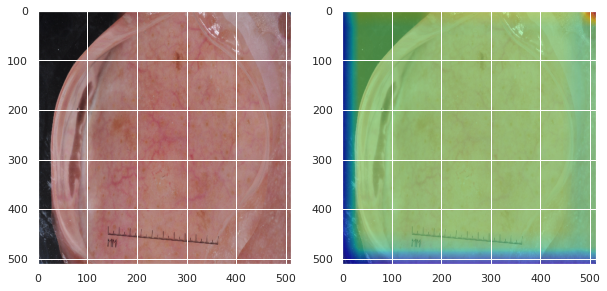

In [118]:
# Visualizing images with and without localization
# Canvas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 10))
# Image without localization
ax[0].imshow((path_to_tensor(img_path).astype('float32')/255).squeeze())
# Image with localization
CAM = plot_CAM(img_path, ax[1], mobilenet_model, all_amp_layer_weights)
plt.show()

In [121]:
# predict_0_0 = 0.7350246
# predict_0_1 = 0.26497543

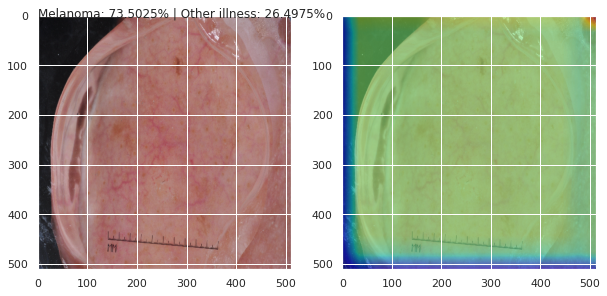

In [122]:
# Getting the image tensor
image_to_predict = path_to_tensor(img_path).astype('float32')/255

# Predicting the image
prediction = ensemble_model.predict(image_to_predict)
prediction_final = "Melanoma: " + str(np.round(predict_0_0*100, decimals = 4)) + "%" + \
                   " | Other illness: " + str(np.round(predict_0_1*100, decimals = 4)) + "%"

# Canvas initialization
fig = plt.figure(figsize = (10, 10))

# First image
ax = fig.add_subplot(121)
ax.imshow(image_to_predict.squeeze())
ax.text(0.3, 1.6, prediction_final)

# Second image
ax = fig.add_subplot(122)
CAM = plot_CAM(img_path, ax, mobilenet_model, all_amp_layer_weights)

plt.show()